In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot, ChaosTools, DynamicalSystems, Distributions, BenchmarkTools, StaticArrays, RandomNumbers, StatsBase

In [20]:
using Pkg
Pkg.add("RandomNumbers")
Pkg.add("StatsBase")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [========>                                ]  18.5 %36.8 %.3 %           ]  71.8 % [=====================================>   ]  90.2 % Resolving package versions...
 Installed CompilerSupportLibraries_jll ─ v0.3.1+0
 Installed ArrayInterface ─────────────── v2.6.1
 Installed Inflate ────────────────────── v0.1.2
 Installed Roots ──────────────────────── v1.0.1
 Installed MacroTools ─────────────────── v0.5.5
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [4fba245c] ↑ ArrayInterface v2.6.0 ⇒ v2.6.1
  [e66e0078] ↑ CompilerSupportLibraries_jll v0.3.0+0 ⇒ v0.3.1+0
  [d25df0c9] ↑ Inflate v0.1.1 ⇒ v0.1.2
  [1914dd2f] ↑ MacroTools v0.5.4 ⇒ v0.5.5
  [f2b01f46] ↑ Roots v1.0.0 ⇒ v1.0.1
 Resolving package versions...
  Updating `~/.julia

In [6]:
Hsys!(x,p)=p*p/(2.)-a*x*x/2. +b*x*x*x*x/4.

Hsys! (generic function with 1 method)

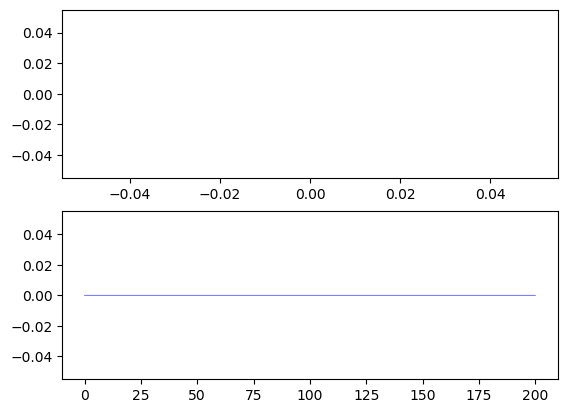

 29.801273 seconds (417.95 M allocations: 18.019 GiB, 13.95% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17e11ded0>

In [3]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0., 10))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 1.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(9)

time=200.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=0.6324555320336759#-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759#-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759#-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759#-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759#+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759#+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759#+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759#+0.1
Es[9]=Es[8]
g[9]=0.04
w=w .* 0. .+ 60.
W=maximum(w)
g=g .* 0. .+ 0.3 /8.

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2.  -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

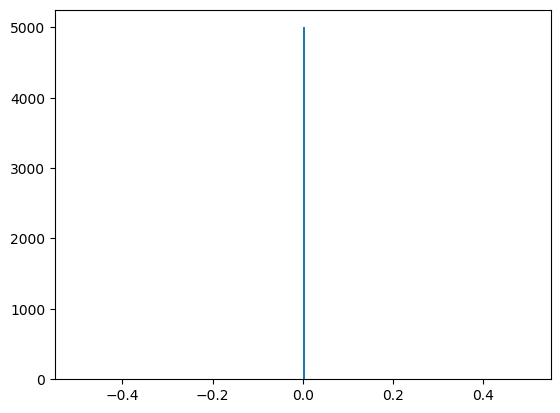

(190987,)


([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.5, -0.495, -0.49, -0.485, -0.48, -0.475, -0.47, -0.46499999999999997, -0.46, -0.455  …  0.45500000000000007, 0.45999999999999996, 0.46499999999999997, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x182a49b50>, PyObject <matplotlib.patches.Rectangle object at 0x182a49910>, PyObject <matplotlib.patches.Rectangle object at 0x182a49f50>, PyObject <matplotlib.patches.Rectangle object at 0x182a49f90>, PyObject <matplotlib.patches.Rectangle object at 0x182f9b390>, PyObject <matplotlib.patches.Rectangle object at 0x182f9be90>, PyObject <matplotlib.patches.Rectangle object at 0x182f9be10>, PyObject <matplotlib.patches.Rectangle object at 0x182f9be50>, PyObject <matplotlib.patches.Rectangle object at 0x182f9b910>, PyObject <matplotlib.patches.Rectangle object at 0x182f9b710>  …  PyObject <matplotlib.patches.Rectangle object

In [9]:
numes=5000
println(size(sol8[10,:]))
Hosci!(x,p)=p*p/(2. *1.)+0.5*1. *60. ^2. *x^2.
x_samps = sample(sol8[10,:], numes, replace=false)
p_samps = sample(sol8[1,:],numes,replace=false)
Energias=Hosci!.(x_samps,p_samps)
hist(Energias,bins=200)

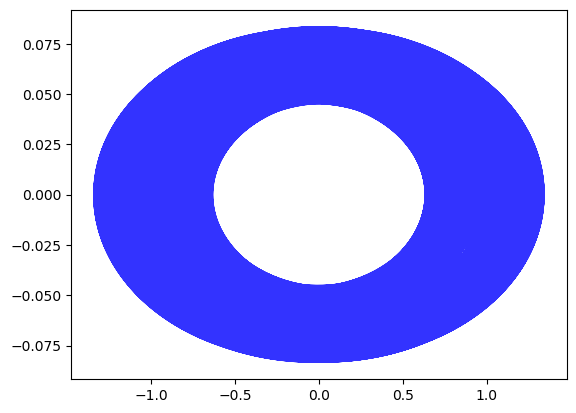

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x18e6b1410>

In [38]:
plot(sol8[13,:],sol8[4,:],color="b",linewidth=0.5,alpha=0.8)

In [4]:
(1+sqrt(big(5)))/2

1.61803398874989484820458683436563811772030917980576286213544862270526046281891

In [4]:
size(sol8[9,:])[1]

312

In [15]:
xs=zeros(1000)
for i in 1:1000
    xs[i]=rand(Distributions.Exponential(1),0,10)
end



MethodError: MethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type Float64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:250
  ...

In [52]:
y=rand(Truncated(Exponential(1), 0.1, 3))
println(y)

1.017746301018936


In [41]:
function initial_sampling(E,w,m,M)
    nums=rand(1)*2*pi
    x=cos(nums[1])*sqrt(E/(0.5*M*w*w))
    y=sin(nums[1])*sqrt(2*m*E)
    return x,y
end

initial_sampling (generic function with 1 method)

In [42]:
initial_sampling(1.,0.6,1.,0.1)

(1.5736421700337977, -1.3823354916751895)

In [38]:
a=rand(1)*2*pi
println(a)
cos(a[1])

[3.5502121592219096]


-0.9176702266659842

In [53]:
a=8
b=10
c,d=-a,-b

(-8, -10)

In [3]:
0.6324555320336759/(0.6324555320336759+0.20)

0.7597469266479578

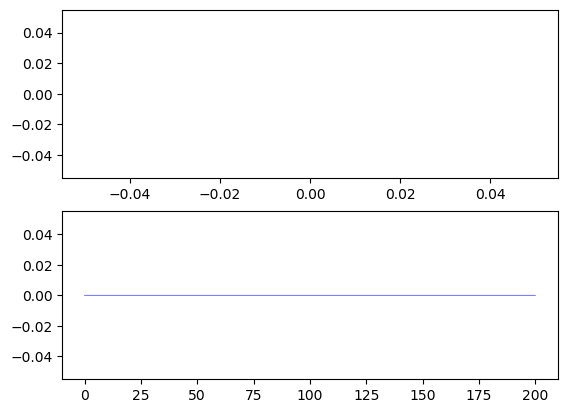

 27.391676 seconds (416.10 M allocations: 17.918 GiB, 15.23% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x152974150>

In [13]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0., 10))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 1.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

N=8

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(9)

time=200.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=0.6324555320336759#-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759#-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759#-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759#-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759#+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759#+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759#+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759#+0.1
Es[9]=Es[8]
g[9]=0.04
w=w .* 0. .+ 60.
W=maximum(w)
g=g .* 0. .+ 0.3 /8.

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2.
    for i in 1:N0
        result += 0.5* -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

# Paper Onofrio hamiltonian

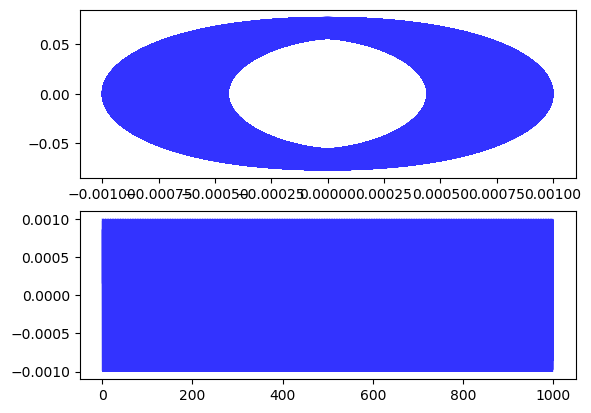

111.155611 seconds (1.06 G allocations: 53.019 GiB, 27.29% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1719702d0>

In [25]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 1.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(9)

time=1000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=0.6324555320336759#-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759#-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759#-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759#-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759#+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759#+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759#+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759#+0.1
Es[9]=Es[8]
g[9]=0.04
w=w .* 0. .+ 60.
W=maximum(w)
g=g .* 0. .+ 0.3 /8.

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. + p[2]^2. /(2. *m[2]) + 0.5*m[2]*w[2]^2. *(q[1]-q[2])^2. + p[3]^2. /(2. *m[3]) + 0.5*m[3]*w[3]^2. *(q[1]-q[3])^2 + p[4]^2. /(2. *m[4]) + 0.5*m[4]*w[4]^2. *(q[1]-q[4])^2. + p[5]^2. /(2. *m[5]) + 0.5*m[5]*w[5]^2. *(q[1]-q[5])^2. + p[6]^2. /(2. *m[6]) + 0.5*m[6]*w[6]^2. *(q[1]-q[6])^2. + p[7]^2. /(2. *m[7]) + 0.5*m[7]*w[7]^2. *(q[1]-q[7])^2. + p[8]^2. /(2. *m[8]) + 0.5*m[8]*w[8]^2. *(q[1]-q[8])^2. + p[9]^2. /(2. *m[9]) + 0.5*m[9]*w[9]^2. *(q[1]-q[9])^2.
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0.001 #xz0[jj]
initial_momentum[1]=0.0002 #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

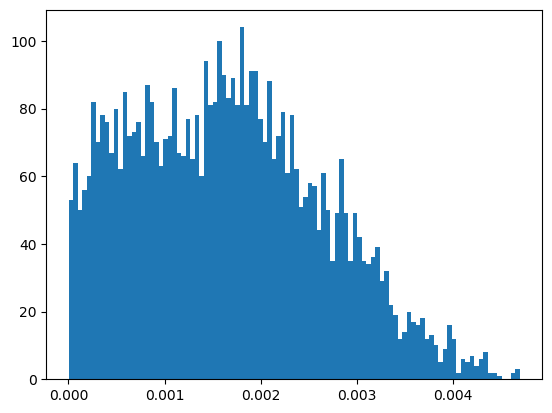

(954931,)


([53.0, 64.0, 50.0, 56.0, 60.0, 82.0, 70.0, 78.0, 76.0, 67.0  …  4.0, 6.0, 8.0, 2.0, 2.0, 1.0, 0.0, 0.0, 2.0, 3.0], [1.6894104317310812e-6, 4.863931856318169e-5, 9.558922669463231e-5, 0.00014253913482608293, 0.00018948904295753354, 0.00023643895108898416, 0.00028338885922043474, 0.0003303387673518854, 0.00037728867548333597, 0.00042423858361478656  …  0.004274131050393737, 0.004321080958525188, 0.004368030866656638, 0.0044149807747880885, 0.00446193068291954, 0.00450888059105099, 0.0045558304991824405, 0.004602780407313892, 0.004649730315445342, 0.0046966802235767924], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x1914cf190>, PyObject <matplotlib.patches.Rectangle object at 0x1914c2f10>, PyObject <matplotlib.patches.Rectangle object at 0x1914cf810>, PyObject <matplotlib.patches.Rectangle object at 0x1914cfb90>, PyObject <matplotlib.patches.Rectangle object at 0x1914cf990>, PyObject <matplotlib.patches.Rectangle object at 0x1914d94d0>, PyObject <matplotlib.patches.R

In [26]:
numes=5000
println(size(sol8[10,:]))
Hosci!(x,p)=p*p/(2. *1.)+0.5*1. *60. ^2. *x^2.
x_samps = sample(sol8[10,900000:end], numes, replace=false)
p_samps = sample(sol8[1,900000:end],numes,replace=false)
Energias=Hosci!.(x_samps,p_samps)
hist(Energias,bins=100)

# Anharmonic potential

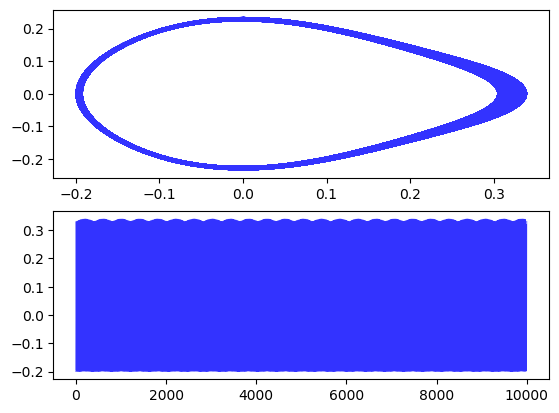

179.394421 seconds (2.12 G allocations: 91.809 GiB, 32.88% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x18c020450>

In [34]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 1.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(9)

time=10000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=1. -0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=1. -0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=1. -0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=1. -0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=1. +0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=1. +0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=1. +0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=1. +0.1
Es[9]=Es[8]
g[9]=0.04
w=w .* 0. .+ 1.
W=maximum(w)
g=g .* 0. .+ 0.01

dts=0.01
Hsys(q,p) = p[1]^2. /(2. *m[1]) +0.0173-(1. /(4. *pi^2. *(sin(2. *pi*(0.1904))+0.25*sin(4. *pi*(0.1904)))))*(sin(2. *pi*(q[1]+0.1904))+0.25*sin(4. *pi*(q[1]+0.1904))) +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)


initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=-0.2 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
#initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
#initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
#initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
#initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

# Anharmonic potential 14 oscillators

[1.9898322048126265, 1.9062803797309054, 1.4043251882561782, 1.5343299270929707, 1.6206322762219971, 1.855931960728003, 1.3225612935573607, 1.1783314879561135, 1.7621874987645276, 2.079817809038952, 1.9408237036373566, 1.3308874098516237, 1.219837451806897, 1.2987705547144592, 1.2547634703463078]


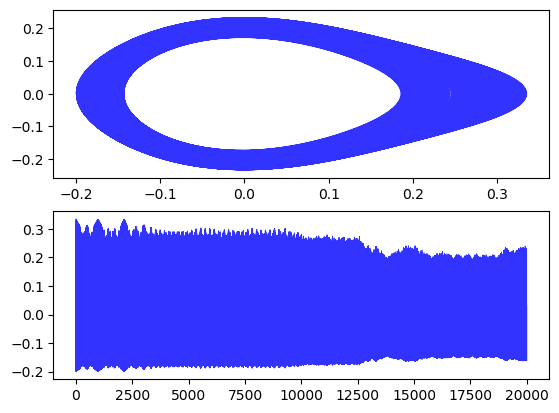

132.944779 seconds (1.45 G allocations: 50.645 GiB, 24.11% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2f7c79d90>

In [54]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return rand()+1.1
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(15)

time=20000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=1. -0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=1. -0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=1. -0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=1. -0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=1. +0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=1. +0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=1. +0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=1. +0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=1. +0.3001
Es[10]=bolz_energy()
g[10]=0.035
w[11]=1. +0.3
Es[11]=Es[10]
g[11]=0.04
w[12]=1. +0.3501
Es[12]=bolz_energy()
g[12]=0.035
w[13]=1. +0.35
Es[13]=Es[12]
g[13]=0.04
w[14]=1. +0.4001
Es[14]=bolz_energy()
g[14]=0.035
w[15]=1. +0.4
Es[15]=Es[14]
g[15]=0.04


w=w .* 0. .+ 1.
W=maximum(w)
g=g .* 0. .+ 0.01
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

dts=0.1
Hsys(q,p) = p[1]^2. /(2. *m[1]) +0.0173-(1. /(4. *pi^2. *(sin(2. *pi*(0.1904))+0.25*sin(4. *pi*(0.1904)))))*(sin(2. *pi*(q[1]+0.1904))+0.25*sin(4. *pi*(q[1]+0.1904))) +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) -q[1]*g[12]*q[12]+p[12]^2. /(2. *m[12])+m[12]*w[12]^2. *q[12]^2. /2. + q[1]^2. *g[12]^2. /(2. *m[12]*w[12]^2.) -q[1]*g[13]*q[13]+p[13]^2. /(2. *m[13])+m[13]*w[13]^2. *q[13]^2. /2. + q[1]^2. *g[13]^2. /(2. *m[13]*w[13]^2.) -q[1]*g[14]*q[14]+p[14]^2. /(2. *m[14])+m[14]*w[14]^2. *q[14]^2. /2. + q[1]^2. *g[14]^2. /(2. *m[14]*w[14]^2.) -q[1]*g[15]*q[15]+p[15]^2. /(2. *m[15])+m[15]*w[15]^2. *q[15]^2. /2. + q[1]^2. *g[15]^2. /(2. *m[15]*w[15]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)


initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=-0.2 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
#initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
#initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
#initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
#initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol14 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol14[16,:],sol14[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol14.t[:], sol14[16,:], color="b",linewidth=0.5,alpha=0.8)

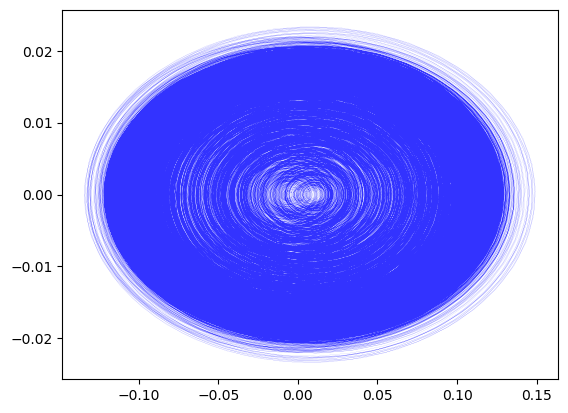

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2df526290>

In [57]:
plot(sol14[20,:],sol14[5,:],color="b",linewidth=0.05,alpha=0.8)

1
[1.9060659677959044, 1.6550635613281126, 1.4006316341811043, 1.62484228723231, 1.1218857603122014, 1.9849566025071246, 1.7298709892342075, 1.5010319564385748, 1.9786253220407526, 1.4534054781889225, 1.6071361671802236, 1.9173940153184081, 1.6595503337993798, 1.813898774255246, 1.6319027909239718]
2
[1.680439966851977, 1.36171858747265, 1.6904201894849646, 1.8792478692199686, 1.9144453970731554, 1.9661517939265603, 1.7533898506570202, 2.0392032859391227, 1.4244953790213635, 1.2327240830504516, 1.7596059499708676, 1.9393438399827836, 1.9080969218307986, 1.1428994247477975, 1.1138967086387186]
3
[1.5897360333447539, 2.051056300886911, 1.801328673849402, 1.790292162461747, 2.059779464628172, 1.9796864725600043, 1.3012877412131485, 1.6401712275862113, 1.1489507078935377, 1.810967179748596, 1.6984528266086625, 1.1115355052758837, 2.0717422743257945, 1.329924123160469, 1.9880510851313486]
4
[1.831724758860419, 1.851955169086033, 1.1483796970815885, 1.664895322858942, 1.2482376013490628, 1.8

29
[1.81408841035435, 1.5649277709386595, 1.5387614226326551, 2.0540515774389214, 1.1106638958931727, 1.275090622165677, 1.8344794724039963, 1.579240780981284, 1.10284113913833, 1.3990434920526895, 1.2481386264412762, 1.9999863702300889, 1.249594673297901, 1.9494909302567773, 1.2859162480990765]
30
[1.8351433296279744, 1.1185387427870932, 2.049715417413693, 1.7673676427169165, 1.542248581935631, 1.2077846394735472, 1.6237076804878632, 1.5059513889138139, 1.365439089511804, 1.6504234006812812, 1.977629056701757, 1.3493140139059794, 1.7982609486144685, 1.3175834888144453, 1.2013067847435186]
31
[1.4073111772584201, 1.1693459841963167, 1.1208133572491306, 1.4395298564598438, 1.5604914185484124, 2.03122150276977, 1.1712715234742117, 1.4759092852156819, 1.2210769880872732, 1.2736075945819805, 1.4331919745276933, 2.043253504401976, 1.1531664574520972, 1.6380340630517531, 1.9367647973335043]
32
[1.6690101653555982, 1.5711417854912746, 1.138511817581732, 1.2754572717693247, 1.7122746089043024,

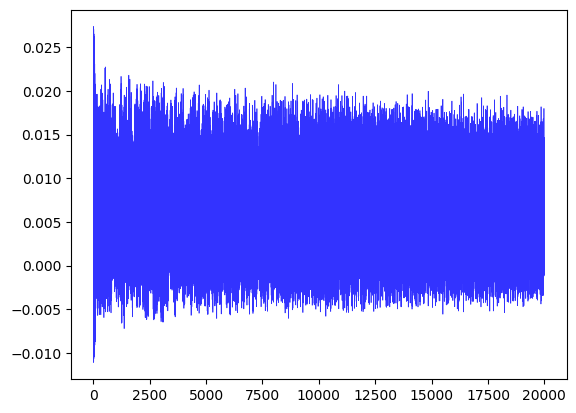

50
[1.8961514893657796, 1.6821427747765072, 1.3758535101144078, 1.9667211917922078, 1.6444499482244084, 1.1815663048479317, 1.5730065680802, 1.9846665210729904, 1.470817804352749, 1.6155144909141719, 1.46506386195875, 1.447605318656513, 1.5277405572420182, 1.2615421879263737, 1.135085663205154]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14f1c2690>

In [15]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return rand()+1.1
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(15)

E14=0.
sol14=0.

for i in 1:50
println(i)

time=20000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=1. -0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=1. -0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=1. -0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=1. -0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=1. +0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=1. +0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=1. +0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=1. +0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=1. +0.3001
Es[10]=bolz_energy()
g[10]=0.035
w[11]=1. +0.3
Es[11]=Es[10]
g[11]=0.04
w[12]=1. +0.3501
Es[12]=bolz_energy()
g[12]=0.035
w[13]=1. +0.35
Es[13]=Es[12]
g[13]=0.04
w[14]=1. +0.4001
Es[14]=bolz_energy()
g[14]=0.035
w[15]=1. +0.4
Es[15]=Es[14]
g[15]=0.04


w=w .* 0. .+ 1.
W=maximum(w)
g=g .* 0. .+ 0.01
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

dts=0.1
Hsys(q,p) = p[1]^2. /(2. *m[1]) +0.0173-(1. /(4. *pi^2. *(sin(2. *pi*(0.1904))+0.25*sin(4. *pi*(0.1904)))))*(sin(2. *pi*(q[1]+0.1904))+0.25*sin(4. *pi*(q[1]+0.1904))) +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) -q[1]*g[12]*q[12]+p[12]^2. /(2. *m[12])+m[12]*w[12]^2. *q[12]^2. /2. + q[1]^2. *g[12]^2. /(2. *m[12]*w[12]^2.) -q[1]*g[13]*q[13]+p[13]^2. /(2. *m[13])+m[13]*w[13]^2. *q[13]^2. /2. + q[1]^2. *g[13]^2. /(2. *m[13]*w[13]^2.) -q[1]*g[14]*q[14]+p[14]^2. /(2. *m[14])+m[14]*w[14]^2. *q[14]^2. /2. + q[1]^2. *g[14]^2. /(2. *m[14]*w[14]^2.) -q[1]*g[15]*q[15]+p[15]^2. /(2. *m[15])+m[15]*w[15]^2. *q[15]^2. /2. + q[1]^2. *g[15]^2. /(2. *m[15]*w[15]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)


initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=-0.2 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
#initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
#initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
#initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
#initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol14 = solve(prob, CalvoSanz4(), dt=dts)
if i==1
    E14=Hsys!.(sol14[16,:],sol14[1,:])
    else
        E14=(E14 .+Hsys!.(sol14[16,:],sol14[1,:])) ./2.
    end
end
plot(sol14.t[:], E14, color="b",linewidth=0.5,alpha=0.8)



# Anharmonic potential 15 oscillators

In [2]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return rand()+1.1
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(16)

time=10000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=1. -0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=1. -0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=1. -0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=1. -0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=1. +0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=1. +0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=1. +0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=1. +0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=1. +0.3001
Es[10]=bolz_energy()
g[10]=0.035
w[11]=1. +0.3
Es[11]=Es[10]
g[11]=0.04
w[12]=1. +0.3501
Es[12]=bolz_energy()
g[12]=0.035
w[13]=1. +0.35
Es[13]=Es[12]
g[13]=0.04
w[14]=1. +0.4001
Es[14]=bolz_energy()
g[14]=0.035
w[15]=1. +0.4
Es[15]=Es[14]
g[15]=0.04
w[15]=1. +0.4
Es[15]=bolz_energy()
g[15]=0.04


w=w .* 0. .+ 1.
W=maximum(w)
g=g .* 0. .+ 0.01
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

dts=0.1
Hsys(q,p) = p[1]^2. /(2. *m[1]) +0.0173-(1. /(4. *pi^2. *(sin(2. *pi*(0.1904))+0.25*sin(4. *pi*(0.1904)))))*(sin(2. *pi*(q[1]+0.1904))+0.25*sin(4. *pi*(q[1]+0.1904))) +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) -q[1]*g[12]*q[12]+p[12]^2. /(2. *m[12])+m[12]*w[12]^2. *q[12]^2. /2. + q[1]^2. *g[12]^2. /(2. *m[12]*w[12]^2.) -q[1]*g[13]*q[13]+p[13]^2. /(2. *m[13])+m[13]*w[13]^2. *q[13]^2. /2. + q[1]^2. *g[13]^2. /(2. *m[13]*w[13]^2.) -q[1]*g[14]*q[14]+p[14]^2. /(2. *m[14])+m[14]*w[14]^2. *q[14]^2. /2. + q[1]^2. *g[14]^2. /(2. *m[14]*w[14]^2.) -q[1]*g[15]*q[15]+p[15]^2. /(2. *m[15])+m[15]*w[15]^2. *q[15]^2. /2. + q[1]^2. *g[15]^2. /(2. *m[15]*w[15]^2.) -q[1]*g[16]*q[16]+p[16]^2. /(2. *m[16])+m[16]*w[16]^2. *q[16]^2. /2. + q[1]^2. *g[16]^2. /(2. *m[16]*w[16]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)


initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=-0.2 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
#initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
#initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
#initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
#initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol15 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol15[17,:],sol15[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol15.t[:], sol15[17,:], color="b",linewidth=0.5,alpha=0.8)

┌ Warning: `Truncated(d::UnivariateDistribution, l::Real, u::Real)` is deprecated, use `truncated(d, l, u)` instead.
│   caller = ip:0x0
└ @ Core :-1


[1.448241261424721, 1.805178435697492, 1.2401408721803626, 1.1956882392066486, 1.1615692510220539, 1.4682736155740261, 1.4923666188517257, 1.9304873702021095, 1.692081334534846, 1.5362912954037775, 1.643035495374759, 1.1443560039283533, 1.6905139444310064, 1.3405735310455038, 1.2907341961103227, 1.3028631902965326]


InterruptException: InterruptException:

1
[1.533749051697511, 1.829361126714448, 2.0217427461247555, 1.1704226906142292, 1.8409589970872922, 2.0405413931773677, 1.9433480070178235, 1.2180162820371234, 1.1655121441125182, 1.925939431692136, 1.8907615892551781, 1.2825188578273434, 1.5532700215698994, 1.2939236106589689, 1.2546716610378899, 2.0395255371496432]
2
[1.7920792502655305, 1.6800870515599746, 1.6942782243991121, 1.4820043764690534, 1.4624287237581042, 1.198864760939223, 1.129699061204369, 1.7615517228485649, 1.8311044921080448, 1.6949626548239471, 2.074216159336088, 1.7370976483210299, 1.122663665463741, 1.6342241573524376, 2.0428945068121713, 1.9500574883498012]
3
[1.1315284113004758, 1.8361609442871893, 1.8536635029283337, 1.5228351085346203, 1.6648149140660804, 1.4398716299032328, 1.9072716833062813, 1.1465988223303727, 1.8397218552480652, 1.576880514248513, 1.627934656485292, 2.0692053614505657, 1.3328756852599746, 1.8824175730347883, 1.2745579041534616, 1.8274929105024884]
4
[1.6801207591509806, 1.270658298211076

27
[1.6593362861787417, 1.1729593020157272, 1.2091220134902076, 1.7529556408489375, 1.6235248471262753, 2.046401803851951, 1.6298744090075181, 1.7843870515584788, 1.8927636981315097, 1.376674851416325, 2.0447635046944583, 1.196745368199449, 1.1816111735228016, 2.0235462875134793, 1.1442350073440053, 2.007669158632834]
28
[1.5026374872994577, 1.8547115213040932, 1.8541235545103123, 1.7771032784496203, 1.9515602591083279, 1.9902998557311498, 1.9756111006925514, 1.3852653392397123, 1.4667141804185286, 1.8463939791343797, 1.4476894341403266, 1.6503590081300028, 1.388445330204385, 1.6544003885795813, 1.492316069552001, 1.4939032681724975]
29
[1.9921704484168556, 1.152062380169701, 1.9120892208197278, 2.0257199154672807, 1.1933462285700842, 1.2691395451534282, 1.3044257690104564, 1.3682466687120605, 1.2518252175202265, 1.5184574616214548, 1.2710379047919087, 1.6605895557267778, 1.9287325787507712, 1.3573245403381635, 1.3723454585929515, 1.8812666011757164]
30
[1.4507973318899818, 1.166462713

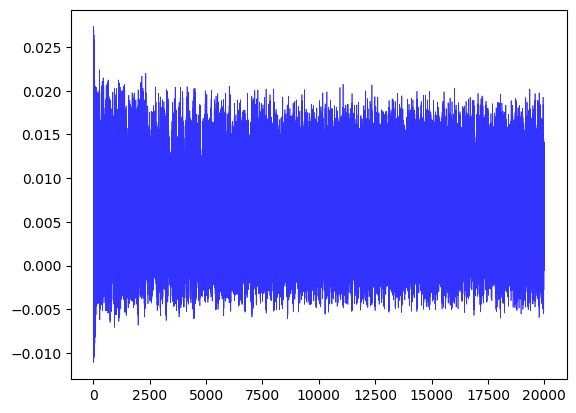


[1.6536603494210405, 1.1848831128811943, 1.5557407259717821, 1.586766536389566, 2.059460850928459, 1.3598184670430287, 1.5834670554766779, 1.9403083890310888, 1.6064069112693453, 1.6312114372129334, 1.2040283209823313, 1.3243617210011047, 1.4238033270230408, 1.6896301209285953, 1.532158310367998, 1.5922957528472705]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x191cd9390>

In [18]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(100000), 0., 1000000000))
end
function bolz_freq(a)
    return rand()+1.1
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(16)

E15=0.
sol15=0.

for i in 1:50
println(i)


time=20000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[1]=0.6324555320336759
w[2]=1. -0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=1. -0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=1. -0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=1. -0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=1. +0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=1. +0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=1. +0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=1. +0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=1. +0.3001
Es[10]=bolz_energy()
g[10]=0.035
w[11]=1. +0.3
Es[11]=Es[10]
g[11]=0.04
w[12]=1. +0.3501
Es[12]=bolz_energy()
g[12]=0.035
w[13]=1. +0.35
Es[13]=Es[12]
g[13]=0.04
w[14]=1. +0.4001
Es[14]=bolz_energy()
g[14]=0.035
w[15]=1. +0.4
Es[15]=Es[14]
g[15]=0.04
w[15]=1. +0.4
Es[15]=bolz_energy()
g[15]=0.04


w=w .* 0. .+ 1.
W=maximum(w)
g=g .* 0. .+ 0.01
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

dts=0.1
Hsys(q,p) = p[1]^2. /(2. *m[1]) +0.0173-(1. /(4. *pi^2. *(sin(2. *pi*(0.1904))+0.25*sin(4. *pi*(0.1904)))))*(sin(2. *pi*(q[1]+0.1904))+0.25*sin(4. *pi*(q[1]+0.1904))) +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) -q[1]*g[12]*q[12]+p[12]^2. /(2. *m[12])+m[12]*w[12]^2. *q[12]^2. /2. + q[1]^2. *g[12]^2. /(2. *m[12]*w[12]^2.) -q[1]*g[13]*q[13]+p[13]^2. /(2. *m[13])+m[13]*w[13]^2. *q[13]^2. /2. + q[1]^2. *g[13]^2. /(2. *m[13]*w[13]^2.) -q[1]*g[14]*q[14]+p[14]^2. /(2. *m[14])+m[14]*w[14]^2. *q[14]^2. /2. + q[1]^2. *g[14]^2. /(2. *m[14]*w[14]^2.) -q[1]*g[15]*q[15]+p[15]^2. /(2. *m[15])+m[15]*w[15]^2. *q[15]^2. /2. + q[1]^2. *g[15]^2. /(2. *m[15]*w[15]^2.) -q[1]*g[16]*q[16]+p[16]^2. /(2. *m[16])+m[16]*w[16]^2. *q[16]^2. /2. + q[1]^2. *g[16]^2. /(2. *m[16]*w[16]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)


initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=-0.2 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
#initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
#initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
#initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
#initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol15 = solve(prob, CalvoSanz4(), dt=dts)
if i==1
    E15=Hsys!.(sol15[17,:],sol15[1,:])
    else
        E15=(E15 .+Hsys!.(sol15[17,:],sol15[1,:])) ./2.
    end
end
plot(sol15.t[:], E15, color="b",linewidth=0.5,alpha=0.8)

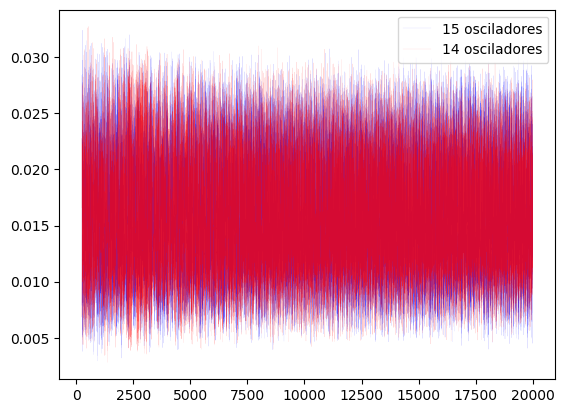

PyObject <matplotlib.legend.Legend object at 0x23c37ed50>

In [30]:
plot(sol15.t[2500:end],E15[2500:end].+0.01, color="b",linewidth=0.05,alpha=0.8,label="15 osciladores")
plot(sol14.t[2500:end], E14[2500:end].+0.01, color="r",linewidth=0.05,alpha=0.8,label="14 osciladores")
#yscale("log")
legend()